In [1]:
import ast
import matplotlib.pyplot as plt
from minisom import MiniSom
import numpy as np
import pandas as pd
from sklearn.preprocessing import minmax_scale, scale
from sklearn.decomposition import PCA
from sklearn.metrics import (adjusted_rand_score, normalized_mutual_info_score,
                             adjusted_mutual_info_score, calinski_harabasz_score)

In [2]:
handpicked_genres =[ "rock",
"classical",
"latin",
"pop",
"jazz",
"soul",
"classic bollywood", 
"rap",
"fold",
"funk",
"opera"]

In [3]:
genres = handpicked_genres
#genres = ['rock', 'classical', 'latin', 'filmi']
tracks = pd.read_csv('../data/tracks_with_genres.csv')
tracks['genres'] = tracks['genres'].apply(ast.literal_eval)
tracks = tracks.explode('genres')
tracks.rename(columns={'genres': 'genre'}, inplace=True)
tracks_subset = tracks[tracks['genre'].isin(genres)]

In [4]:
genres = tracks_subset['genre'].astype('category')
labels_integers = genres.cat.codes

## Data
A subset of the data has been used for clustering in this notebook.
The distribution of the data between genres can be seen in the following plot.

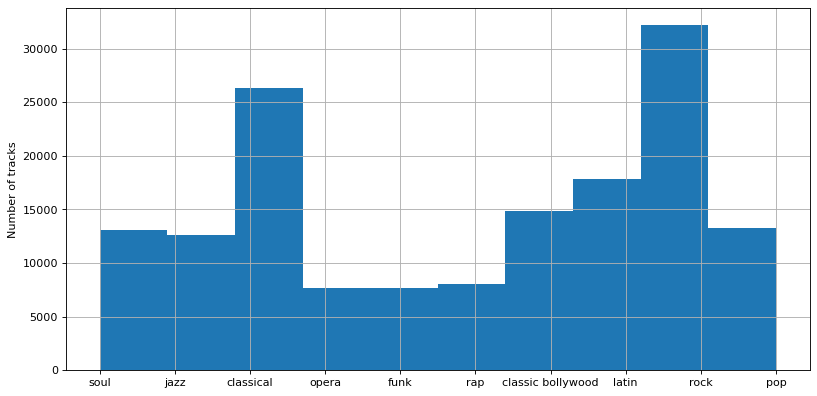

In total, there are 153594 tracks in the dataset used.


In [5]:
plt.figure(figsize=(12, 6), dpi=80)
tracks_subset['genre'].hist()
plt.ylabel('Number of tracks')
plt.show()
print(f'In total, there are {tracks_subset.shape[0]} tracks in the dataset used.')


In [6]:
features = ['acousticness', 'instrumentalness','tempo']
X = tracks_subset[features]

pca_X = PCA(n_components=2).fit_transform(X)
X = scale(pca_X)

som_shape = (5,2)

som = MiniSom(som_shape[0], som_shape[1], 2, sigma=0.5, learning_rate=0.21)
som.train_batch(X, 500000, verbose=True)

 [   1280 / 500000 ]   0% - 0:00:48 left 

 [   1869 / 500000 ]   0% - 0:00:53 left 

 [   3742 / 500000 ]   1% - 0:00:46 left 

 [   4903 / 500000 ]   1% - 0:00:43 left 

 [   6418 / 500000 ]   1% - 0:00:44 left 

 [   7436 / 500000 ]   1% - 0:00:44 left 

 [   8670 / 500000 ]   2% - 0:00:45 left 

 [   9426 / 500000 ]   2% - 0:00:45 left 

 [  11118 / 500000 ]   2% - 0:00:44 left 

 [  11852 / 500000 ]   2% - 0:00:44 left 

 [  13974 / 500000 ]   3% - 0:00:43 left 

 [  14895 / 500000 ]   3% - 0:00:42 left 

 [  17812 / 500000 ]   4% - 0:00:42 left 

 [  19845 / 500000 ]   4% - 0:00:42 left 

 [  20369 / 500000 ]   4% - 0:00:42 left 

 [  22264 / 500000 ]   4% - 0:00:42 left 

 [  22948 / 500000 ]   5% - 0:00:42 left 

 [  25830 / 500000 ]   5% - 0:00:41 left 

 [ 500000 / 500000 ] 100% - 0:00:00 left 
 quantization error: 0.4706881543809369


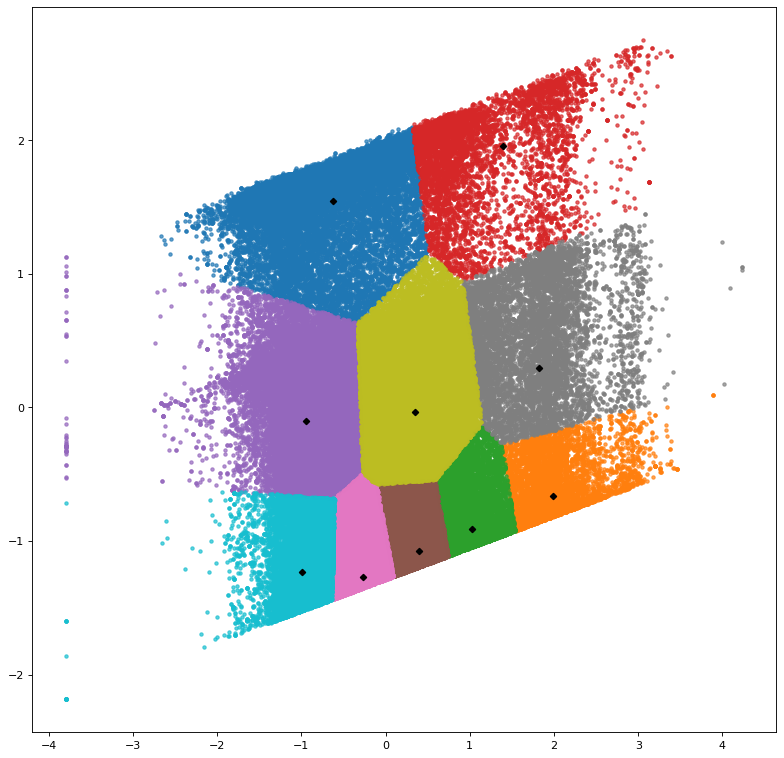

In [7]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in X]).T
# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)


# plotting the clusters using the first 2 dimensions of the data
plt.figure(figsize=(12, 12), dpi=80)
for c in np.unique(cluster_index):
    plt.scatter(X[cluster_index == c, 0],
                X[cluster_index == c, 1], marker='.', label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=10, linewidths=5, color='k', label='centroid')

Convert the pandas dataframe to a matrix of numerical values and normalize them.

In [8]:
print('ARI', adjusted_rand_score(labels_integers, cluster_index))
print('NMI', normalized_mutual_info_score(labels_integers, cluster_index))
print('AMI', adjusted_mutual_info_score(labels_integers, cluster_index))
print('Calinski Harabasz', calinski_harabasz_score(X, labels_integers))

ARI 0.09551670617879156
NMI 0.1806446094343501
AMI 0.18054573381139805
Calinski Harabasz 8637.395090107177
